<IPython.core.display.Javascript object>


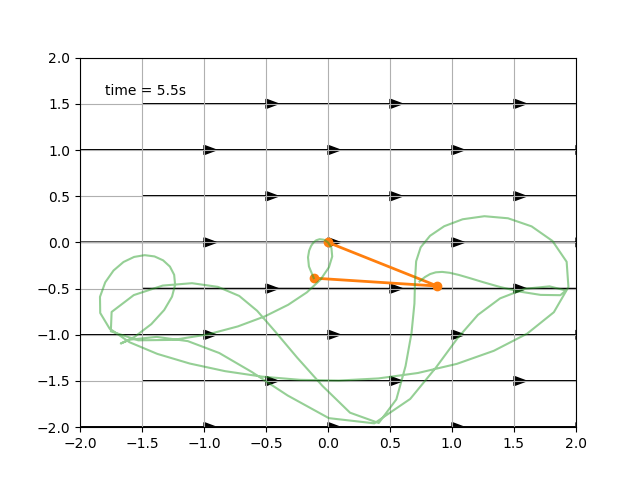

In [40]:
"""
===========================
The double pendulum problem
===========================

This animation illustrates the double pendulum problem.
"""

# Double pendulum formula translated from the C code at
# http://www.physics.usyd.edu.au/~wheat/dpend_html/solve_dpend.c
%matplotlib notebook
from numpy import sin, cos
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation
from math import pi

G = 9.8  # acceleration due to gravity, in m/s^2
L1 = 1.0  # length of pendulum 1 in m
L2 = 1.0  # length of pendulum 2 in m
M1 = 1.0  # mass of pendulum 1 in kg
M2 = 1.0  # mass of pendulum 2 in kg
Q1 = 1.0  #charge of pendulum 1
Q2 = 1.0  #charge of pendulum 2
E_const = 1997.74 #N/C
U_const = 7990.96 #V

def derivs(state, t):

    dydx = np.zeros_like(state)
    dydx[0] = state[1] + 2

    del_ = state[2] - state[0]
    den1 = (M1 + M2)*L1 - M2*L1*cos(del_)*cos(del_)
    dydx[1] = (M2*L1*state[1]*state[1]*sin(del_)*cos(del_) +
               M2*G*sin(state[2])*cos(del_) +
               M2*L2*state[3]*state[3]*sin(del_) -
               (M1 + M2)*G*sin(state[0]))/den1

    dydx[2] = state[3] + 2

    den2 = (L2/L1)*den1
    dydx[3] = (-M2*L2*state[3]*state[3]*sin(del_)*cos(del_) +
               (M1 + M2)*G*sin(state[0])*cos(del_) -
               (M1 + M2)*L1*state[1]*state[1]*sin(del_) -
               (M1 + M2)*G*sin(state[2]))/den2

    return dydx

# create a time array from 0..100 sampled at 0.05 second steps
#dt = 0.05
#t = np.arange(0.0, 20, dt)

# th1 and th2 are the initial angles (degrees)
# w10 and w20 are the initial angular velocities (degrees per second)
#th1 = 120.0
#w1 = 0.0
#th2 = -10.0
#w2 = 0.0

# initial state
state = np.radians([th1, w1, th2, w2])

# integrate your ODE using scipy.integrate.
#y = integrate.odeint(derivs, state, t)

#x1 = L1*sin(y[:, 0])
#y1 = -L1*cos(y[:, 0])

#x2 = L2*sin(y[:, 2]) + x1
#y2 = -L2*cos(y[:, 2]) + y1


#nx, ny = 400, 400
#x = np.linspace(-2, 2, nx)
#y = np.linspace(-2, 2, ny)
#X, Y = np.meshgrid(x, y)
#u, v = np.meshgrid(1,1)
#plt.quiver(x, y, u, v, scale=100)


fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
ax.grid()

for i in range (-2,2):
    for j in range (-2,2):
        ax.arrow(i+0.5, j+0.5, 1, 0, head_width=0.1, head_length=0.1, fc='k', ec='k')
for i in range (-2,2):
    for j in range (-2,2):
        ax.arrow(i, j, 1, 0, head_width=0.1, head_length=0.1, fc='k', ec='k')



line, = ax.plot([], [], 'o-', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)




class doublep:
    def __init__(self,theta,phi):

        # create a time array from 0..100 sampled at 0.05 second steps
        self.dt = 0.05
        self.t = np.arange(0.0, 100, self.dt)

        # th1 and th2 are the initial angles (degrees)
        # w10 and w20 are the initial angular velocities (degrees per second)
        self.th1 = theta
        self.w1 = 0.0
        self.th2 = phi
        self.w2 = 0.0

        self.rad = pi/180

        # initial state
        self.state = np.array([self.th1, self.w1, self.th2, self.w2])*pi/180. 

        # integrate your ODE using scipy.integrate.
        self.y = integrate.odeint(derivs, self.state, self.t)

        self.x1 = L1*sin(self.y[:,0])
        self.y1 = -L1*cos(self.y[:,0])

        self.x2 = L2*sin(self.y[:,2]) + self.x1
        self.y2 = -L2*cos(self.y[:,2]) + self.y1

        self.history = [[],[]]

        #self.color = colors.pop()

        self.line, = ax.plot([], [], 'o-', lw=2,)
        self.hist, = ax.plot([],[],'-',alpha=.5)
        self.time_template = 'time = %.1fs'
        self.time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

    def start(self):
        self.line.set_data([], [])
        self.hist.set_data([], [])
        self.history = [[],[]]
        return self.line, self.time_text

    def animate(self,i):
        self.thisx = [0, self.x1[i], self.x2[i]]
        self.thisy = [0, self.y1[i], self.y2[i]]

        self.history[0].append(self.x2[i])
        self.history[1].append(self.y2[i])

        self.line.set_data(self.thisx, self.thisy)
        self.hist.set_data(self.history[0],self.history[1])
        return self.line, self.hist

ob = doublep(120.0,-10.0)
#ob2 = doublep(90,90)
#ob3 = doublep(90,89.5)

def init():
    time_text.set_text('')
    return ob.start(),time_text
    
    #ob2.start(),\
    #ob3.start()

def animate(i):
    time_text.set_text(time_template % (i*dt))
    return ob.animate(i),time_text
    #ob2.animate(i),\
    #ob3.animate(i)

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(ob.y)),
    interval=25, blit=False, init_func=init)


#ani.save('double_pendulum.mp4', fps=24,bitrate=-1,dpi=200)
plt.show()

<IPython.core.display.Javascript object>


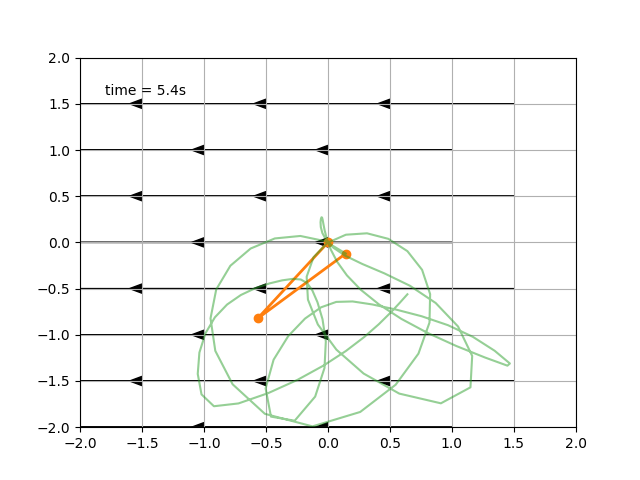

In [42]:
"""
===========================
The double pendulum problem
===========================

This animation illustrates the double pendulum problem.
"""

# Double pendulum formula translated from the C code at
# http://www.physics.usyd.edu.au/~wheat/dpend_html/solve_dpend.c
%matplotlib notebook
from numpy import sin, cos
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation
from math import pi

G = 9.8  # acceleration due to gravity, in m/s^2
L1 = 1.0  # length of pendulum 1 in m
L2 = 1.0  # length of pendulum 2 in m
M1 = 1.0  # mass of pendulum 1 in kg
M2 = 1.0  # mass of pendulum 2 in kg
Q1 = 1.0  #charge of pendulum 1
Q2 = 1.0  #charge of pendulum 2
E_const = 1997.74 #N/C
U_const = 7990.96 #V

def derivs(state, t):

    dydx = np.zeros_like(state)
    dydx[0] = state[1] + (-2)

    del_ = state[2] - state[0]
    den1 = (M1 + M2)*L1 - M2*L1*cos(del_)*cos(del_)
    dydx[1] = (M2*L1*state[1]*state[1]*sin(del_)*cos(del_) +
               M2*G*sin(state[2])*cos(del_) +
               M2*L2*state[3]*state[3]*sin(del_) -
               (M1 + M2)*G*sin(state[0]))/den1

    dydx[2] = state[3] + (-2)

    den2 = (L2/L1)*den1
    dydx[3] = (-M2*L2*state[3]*state[3]*sin(del_)*cos(del_) +
               (M1 + M2)*G*sin(state[0])*cos(del_) -
               (M1 + M2)*L1*state[1]*state[1]*sin(del_) -
               (M1 + M2)*G*sin(state[2]))/den2

    return dydx

# create a time array from 0..100 sampled at 0.05 second steps
#dt = 0.05
#t = np.arange(0.0, 20, dt)

# th1 and th2 are the initial angles (degrees)
# w10 and w20 are the initial angular velocities (degrees per second)
#th1 = 120.0
#w1 = 0.0
#th2 = -10.0
#w2 = 0.0

# initial state
state = np.radians([th1, w1, th2, w2])

# integrate your ODE using scipy.integrate.
#y = integrate.odeint(derivs, state, t)

#x1 = L1*sin(y[:, 0])
#y1 = -L1*cos(y[:, 0])

#x2 = L2*sin(y[:, 2]) + x1
#y2 = -L2*cos(y[:, 2]) + y1


#nx, ny = 400, 400
#x = np.linspace(-2, 2, nx)
#y = np.linspace(-2, 2, ny)
#X, Y = np.meshgrid(x, y)
#u, v = np.meshgrid(1,1)
#plt.quiver(x, y, u, v, scale=100)


fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
ax.grid()

for i in range (-2,2):
    for j in range (-2,2):
        ax.arrow(i+0.5, j+0.5, -1, 0, head_width=0.1, head_length=0.1, fc='k', ec='k')
for i in range (-2,2):
    for j in range (-2,2):
        ax.arrow(i, j, -1, 0, head_width=0.1, head_length=0.1, fc='k', ec='k')



line, = ax.plot([], [], 'o-', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)




class doublep:
    def __init__(self,theta,phi):

        # create a time array from 0..100 sampled at 0.05 second steps
        self.dt = 0.05
        self.t = np.arange(0.0, 100, self.dt)

        # th1 and th2 are the initial angles (degrees)
        # w10 and w20 are the initial angular velocities (degrees per second)
        self.th1 = theta
        self.w1 = 0.0
        self.th2 = phi
        self.w2 = 0.0

        self.rad = pi/180

        # initial state
        self.state = np.array([self.th1, self.w1, self.th2, self.w2])*pi/180. 

        # integrate your ODE using scipy.integrate.
        self.y = integrate.odeint(derivs, self.state, self.t)

        self.x1 = L1*sin(self.y[:,0])
        self.y1 = -L1*cos(self.y[:,0])

        self.x2 = L2*sin(self.y[:,2]) + self.x1
        self.y2 = -L2*cos(self.y[:,2]) + self.y1

        self.history = [[],[]]

        #self.color = colors.pop()

        self.line, = ax.plot([], [], 'o-', lw=2,)
        self.hist, = ax.plot([],[],'-',alpha=.5)
        self.time_template = 'time = %.1fs'
        self.time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

    def start(self):
        self.line.set_data([], [])
        self.hist.set_data([], [])
        self.history = [[],[]]
        return self.line, self.time_text

    def animate(self,i):
        self.thisx = [0, self.x1[i], self.x2[i]]
        self.thisy = [0, self.y1[i], self.y2[i]]

        self.history[0].append(self.x2[i])
        self.history[1].append(self.y2[i])

        self.line.set_data(self.thisx, self.thisy)
        self.hist.set_data(self.history[0],self.history[1])
        return self.line, self.hist

ob = doublep(120.0,-10.0)
#ob2 = doublep(90,90)
#ob3 = doublep(90,89.5)

def init():
    time_text.set_text('')
    return ob.start(),time_text
    
    #ob2.start(),\
    #ob3.start()

def animate(i):
    time_text.set_text(time_template % (i*dt))
    return ob.animate(i),time_text
    #ob2.animate(i),\
    #ob3.animate(i)

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(ob.y)),
    interval=25, blit=False, init_func=init)


#ani.save('double_pendulum.mp4', fps=24,bitrate=-1,dpi=200)
plt.show()